# Week 5 - Decision Trees and Random Forests
#### Part 4
### Notebook created by Jonathan Penava
By the end of this lesson you should know what a decision tree algorithm is, how it is constructed, and how to create a machine learning algorithm that uses decision trees.

## Overview
- Data Mining vs Machine Learning
- Decision Trees in Detail
- Decision Tree Example
- <span style="color:red;">Random Forests</span>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['a','b','c','d','e','f']  
r1 = [2] + (np.random.randint(1,20,5)).tolist() + [1]
r2 = [1] + (np.random.randint(1,20,5)).tolist() + [1]
r3 = [3] + (np.random.randint(1,20,5)).tolist() + [1]
r4 = [7] + (np.random.randint(1,20,5)).tolist() + [0]
r5 = [9] + (np.random.randint(1,20,5)).tolist() + [0]
r6 = [8] + (np.random.randint(1,20,5)).tolist() + [0]

cols = ['X1','X2','X3','X4','X5','X6', 'Y']   
multiArr = [r1, r2, r3, r4, r5, r6]
dataFrame = pd.DataFrame(data=multiArr, index=labels, columns=cols)
dataFrame

,X1,X2,X3,X4,X5,X6,Y
a,2,17,11,6,14,8,1
b,1,15,13,12,10,12,1
c,3,16,6,2,13,2,1
d,7,2,2,14,4,6,0
e,9,1,11,2,13,8,0
f,8,14,6,14,14,4,0


In [21]:

X, y = dataFrame.drop('Y', axis=1), dataFrame['Y'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=87)

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



[Text(0.5, 0.75, 'X1 <= 5.0\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

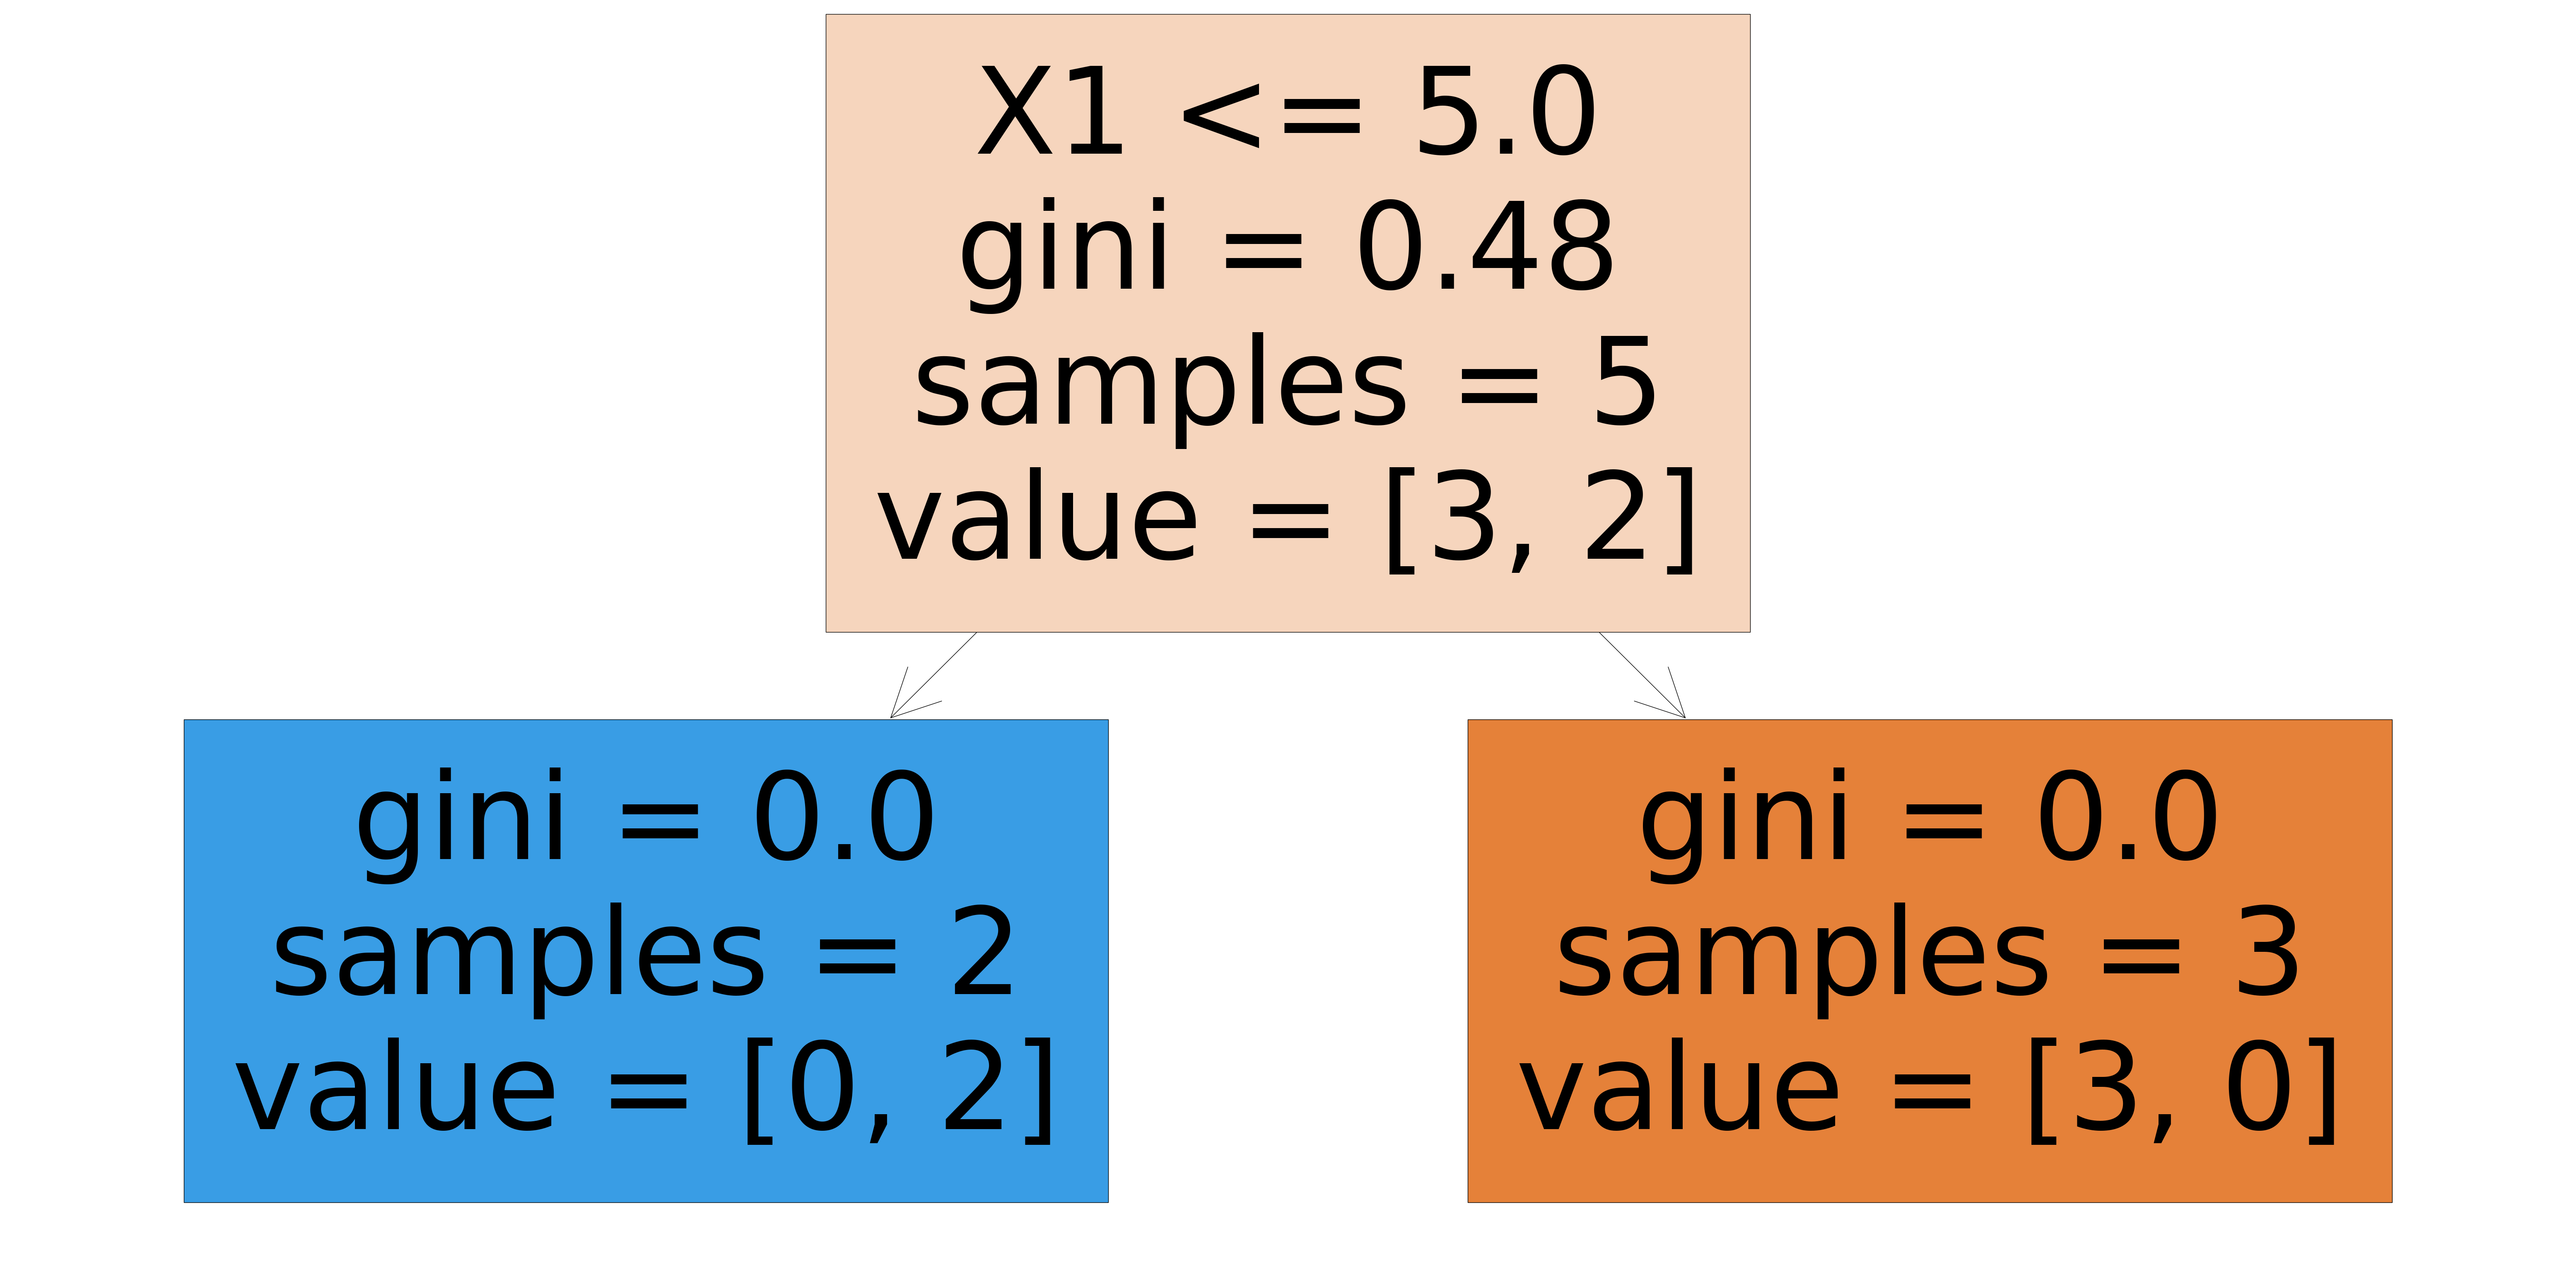

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80, 40))  # Set the figure size
fn = ['X1','X2','X3','X4','X5','X6']
plot_tree(dtree, filled=True, feature_names=fn)

What happened here?  We have 6 points of X, but our tree is only 2 options, why?  If we look at our precision right now it is 100% accurate, but it is only looking at X1, not any of the other data.  

While it is accurate on our current data, it might fail on new data.  We are going to consider the idea of a random forest.  What a random forest does is it breaks our data into small clusters and from each of those clusters it creates a decision tree.  Those trees are then combined and majority rules the decision.  

## Benefits and challenges of random forest

### Key Benefits
#### Reduced risk of overfitting: 
As we can see from the above example, decision trees have a tendancy of trying to tightly fit the sample data.  By using a random forest, the multiple number of trees prevents this type of fixation.  This can reduce the probability of errors when interpreting new data.

#### Provides flexibility: 
It can handle both regression and classification models with accuracy.

#### Easy to determine feature importance: 
It makes it easier to evaluate how specific variables are more or less important when calculating results.


### Key Challenges
#### Time-consuming process and Requires more resources: 
Since multiple trees are being generated from the data set, the computing time needed to evaluate these trees is increased.

#### More complex: 
The prediction of a single tree is easier to compute then a combination of different decision trees in a random forest.
<br>
Source: https://www.ibm.com/topics/random-forest 

Try redoing the Titanic model from the previous part but using a Random Forest instead of a decision tree.  To import the model you will need <br><br>
<code>
from sklearn.ensemble import RandomForestClassifier<br>
rftree = RandomForestClassifier()
</code>